In [1]:
import numpy as np
import math

def gibbs(h, a,b,c,d,e,f,g, T):
    return (h - a*T*math.log(T)-b*T**2-(c/2)*T**3-(d/3)*T**4+(e/2/T)+f+g*T) #kJ/mol

def hf(h, a,b,c,d,e,f, T):
    return (h - a*T+b*T**2 -c*T**3-d*T**4+(e/T)+f) #kJ/mol

def ke(G, T, R):
    return math.exp(-G/R/T)


def computeGibbs(G,n):
    sum = 0
    for i,v in enumerate(G):
        sum += G[i]*n[i]
    
    return sum

def equilb_const(G, R, T):
    return math.exp(-G/R/T)

In [2]:
# G, Hf, HHV, G, H, a,b,c,d,e,f,g
dictData = {
'C': [0, 0, 0, 0,0,0,0,0,0,0],
'CO': [ 283, -137.3, -110.5, 5.619e-3, -1.19e-5, 6.383e-9,21.846e-12, -4.891e-2, 0.868, -6.131e-2],
'CO2': [0, -394.4, -393.5, -1.949e-2, 3.122e-5, -2.448e-8, 6.946e-12, -4.891e-2, 5.27, -0.1207],
'CH4': [890.3, -50.8, -74.8, -4.62e-2, 1.13e-5, 1.319e-8, -6.647e-12, -4.891e-2, 14.11, 0.2234],
'C2H4': [1411, 68.1, 52.3, -7.281e-2, 5.802e-5, -1.861e-8, 5.648e-13, -9.782e-2, -0.32, -0.4076],
'CH3OH': [763.9, -161.6, -201.2, -5.834e-2, -.07e-5, 1.491e-8, -9.614e-12, -4.891e-2, 16.88, -0.2467],
'Steam': [0, -228.6, -241.8, -8.95e-3, -3.672e-6, 5.209e-9, -1.478e-12, 0, 2.868, -0.0172],
'H2O': [0, -237.2, -285.8, 0,0,0,0,0,0,0],
'O2': [0, 0, 0, 0,0,0,0,0,0,0],
'H2': [285.8, 0, 0, 0,0,0,0,0,0,0]
}

In [3]:
h, a,b,c,d,e,f,g = dictData['CO2'][2:]
G_CO2 = gibbs(h, a,b,c,d,e,f,g, 2000)
H_CO2 = hf(h, a,b,c,d,e,f, 2000)
G_CO2, H_CO2

(-397.35216768788297, -139.66602445499996)

In [4]:
h, a,b,c,d,e,f,g = dictData['CO'][2:]
G_CO = gibbs(h, a,b,c,d,e,f,g, 2000)
H_CO = hf(h, a,b,c,d,e,f, 2000)
G_CO, H_CO

(-412.11495406783393, -569.070024455)

In [5]:
h, a,b,c,d,e,f,g = dictData['O2'][2:]
G_O2 = gibbs(h, a,b,c,d,e,f,g, 2000)
H_O2 = hf(h, a,b,c,d,e,f, 2000)
G_O2, H_O2

(0.0, 0.0)

In [6]:
G_CO + G_O2 - G_CO2

-14.762786379950967

In [7]:
# biomass formula
# hydrogen/carbon
a = 0
# oxygen/carbon
b = 0
# nitrogen/carbon
c = 0

In [8]:
CHaObNc = (1,a,b)

In [9]:
f = open("data/data.txt", "r")
dataList =[]
sNO = []
count = 0
show_n=5
k = 0

for l in f:
    # get first letter
    w = l.split(' ', 1)[0]
    if w == 'NO' and count < 2:
        sNO.append(l)
        count += 1

    try:
        x = int(w)        
    except Exception:
        continue

    if x >= 600:
        continue   

    m = l.replace(',','')

    # check for compound name
    d = m.split(' ')

    if len(d) > 3:
        try:
            x = float(d[3])        
        except Exception:
            d[2] = d[2] + '-' + d[3]
            d.remove(d[3])
            m = ' '.join(d)

    n = m.count(' ')
    x = m.replace(' ',',')
    x = x.replace('\n', '')

    if(n < 14):
        diff = 14 - n       
        for i in range(diff):
            x = x + ','
        
        # print(x)
    
    dataList.append(x)   

    if k < show_n:
        print(l, x)
        k += 1

f.close()

1 AR ARGON 39.948 -189.9 -185.9 150.8 48.7 0.075 1373 -183 6531 1
 1,AR,ARGON,39.948,-189.9,-185.9,150.8,48.7,0.075,1373,-183,6531,1,,
2 BCL3 BORON TRICHLORIDE 117.169 -107.3 12.5 452.0 38.7 1350 11 2
 2,BCL3,BORON-TRICHLORIDE,117.169,-107.3,12.5,452.0,38.7,1350,11,2,,,,
3 BF3 BORON TRIFLUORIDE 67.805 -126.7 -99.9 260.8 49.9 3
 3,BF3,BORON-TRIFLUORIDE,67.805,-126.7,-99.9,260.8,49.9,3,,,,,,
4 BR2 BROMINE 159.808 -7.2 58.7 584.0 103.4 0.127 3119 20 30,187 4
 4,BR2,BROMINE,159.808,-7.2,58.7,584.0,103.4,0.127,3119,20,30187,4,,
5 CLNO NITROSYL CHLORIDE 65.459 -59.7 -5.5 440.0 91.2 0.139 1420 -12 25,707 5
 5,CLNO,NITROSYL-CHLORIDE,65.459,-59.7,-5.5,440.0,91.2,0.139,1420,-12,25707,5,,


In [10]:
len(dataList), len(sNO), count

(1000, 2, 2)

In [11]:
sNO

['NO FORMULA COMPOUND NAME MOLWT TFP TBP TC PC VC LDEN TDEN HVAP NO\n',
 'NO VISA VISB DELHF DELGF CPVAPA CPVAPB CPVAPC CPVAPD ANTA ANTB ANTC TMN TMX NO\n']

In [12]:
heading = (sNO[0].replace('COMPOUND NAME', 'COMPOUND-NAME') + ',,,' + sNO[1]).replace('\n','').replace(' ',',')
heading

'NO,FORMULA,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,TDEN,HVAP,NO,,,NO,VISA,VISB,DELHF,DELGF,CPVAPA,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO'

In [13]:
dataList[:10]

['1,AR,ARGON,39.948,-189.9,-185.9,150.8,48.7,0.075,1373,-183,6531,1,,',
 '2,BCL3,BORON-TRICHLORIDE,117.169,-107.3,12.5,452.0,38.7,1350,11,2,,,,',
 '3,BF3,BORON-TRIFLUORIDE,67.805,-126.7,-99.9,260.8,49.9,3,,,,,,',
 '4,BR2,BROMINE,159.808,-7.2,58.7,584.0,103.4,0.127,3119,20,30187,4,,',
 '5,CLNO,NITROSYL-CHLORIDE,65.459,-59.7,-5.5,440.0,91.2,0.139,1420,-12,25707,5,,',
 '6,CL2,CHLORINE,70.906,-101.0,-34.5,417.0,77.0,0.124,1563,-34,20432,6,,',
 '7,CL3P,PHOSPHORUS-TRICHLORIDE,137.333,-112.2,75.8,563.0,0.260,1574,21,7,,,,',
 '8,CL4SI,SILICON-TETRACHLORIDE,169.898,-68.9,57.2,507.0,37.5,0.326,1480,20,27549,8,,',
 '9,D2,DEUTERIUM,4.032,-254.5,-249.5,38.4,16.6,0.060,165,-250,1223,9,,',
 '10,D2O,DEUTERIUM-OXIDE,20.031,3.8,101.4,644.0,216.6,0.056,1105,20,41366,10,,']

In [14]:
dataList2 = [(x + ','+ y) for x in dataList for y in dataList if x.split(',',1)[0] == y.split(',',1)[0]][1::2]
dataList2[:10]


['1,AR,ARGON,39.948,-189.9,-185.9,150.8,48.7,0.075,1373,-183,6531,1,,,1,107.57,58.76,20.804,-3.211E-05,51.665E-09,15.2330,700.51,-5.84,-192,-179,1,,,',
 '2,BCL3,BORON-TRICHLORIDE,117.169,-107.3,12.5,452.0,38.7,1350,11,2,,,,,2,2,,,,,,,,,,,,,',
 '3,BF3,BORON-TRIFLUORIDE,67.805,-126.7,-99.9,260.8,49.9,3,,,,,,,3,3,,,,,,,,,,,,,',
 '4,BR2,BROMINE,159.808,-7.2,58.7,584.0,103.4,0.127,3119,20,30187,4,,,4,387.82,292.79,33.859,11.254E-03,-1.192E-05,45.343E-10,15.8441,2582.32,-51.56,-14,81,4,,',
 '5,CLNO,NITROSYL-CHLORIDE,65.459,-59.7,-5.5,440.0,91.2,0.139,1420,-12,25707,5,,,5,52.63,66.99,34.097,44.715E-03,-3.340E-05,10.149E-09,16.9505,2520.70,-23.46,-63,12,5,,',
 '6,CL2,CHLORINE,70.906,-101.0,-34.5,417.0,77.0,0.124,1563,-34,20432,6,,,6,191.96,172.35,26.929,33.838E-03,-3.869E-05,15.470E-09,15.9610,1978.32,-27.01,-101,-9,6,,',
 '7,CL3P,PHOSPHORUS-TRICHLORIDE,137.333,-112.2,75.8,563.0,0.260,1574,21,7,,,,,7,7,,,,,,,,,,,,,',
 '8,CL4SI,SILICON-TETRACHLORIDE,169.898,-68.9,57.2,507.0,37.5,0.326,1480,20,2

In [15]:
dataList3 =[]
j = 0;
for i,v in enumerate(dataList2):
    d = v.split(',',1)[0]
    if (j+1)==int(d):
        # print(j+1,d)
        dataList3.append(v)
        j = j+1

dataList3[50:60]

['51,CHCLF2,CHLORODIFLUOROMETHANE,86.469,-160.2,-40.8,369.2,49.8,0.165,1230,16,20205,51,,,51,-502.00,-470.89,17.300,16.182E-02,-1.170E-04,30.585E-09,15.5602,1704.80,-41.30,-48,-33,51,,',
 '52,CHCL2F,DICHLOROFLUOROMETHANE,102.923,-135.2,8.8,451.6,51.7,0.197,1380,9,24953,52,,,52,-298.94,-268.37,23.664,15.814E-02,-1.200E-04,32.636E-09,52,,,,,,,',
 '53,CHCL3,CHLOROFORM,119.378,-63.6,61.1,536.4,54.7,0.239,1489,20,29726,53,,,53,394.81,246.50,-101.32,-68.58,24.003,18.933E-02,-1.841E-04,66.570E-09,15.9732,2696.79,-46.16,-13,97,53',
 '54,CHN,HYDROGEN-CYANIDE,27.026,-13.3,25.7,456.8,53.9,0.139,688,20,25234,54,,,54,194.70,145.31,130.63,120.20,21.863,60.625E-03,-4.961E-05,18.154E-09,16.5138,2585.80,-37.15,-39,57,54',
 '55,CH2BR2,DIBROMOMETHANE,173.835,-52.6,96.8,583.0,71.9,2500,20,55,,,,,55,428.91,294.57,-4.19,-5.61,55,,,,,,,,,',
 '56,CH2CL2,DICHLOROMETHANE,84.993,-95.1,39.8,510.0,60.8,0.193,1317,25,28010,56,,,56,359.55,225.13,-95.46,-68.91,12.954,16.232E-02,-1.302E-04,42.077E-09,16.3029,2622.44,-

In [16]:
f = open("data/data_out.txt", "w")
f.write(heading+'\n')
for l in dataList3:
    f.write(l+'\n')
f.close()

In [17]:
import pandas as pd
df = pd.read_csv('data/data_out.txt')
df.head()

,NO,FORMULA,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,...,CPVAPA,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO.3
0,1,AR,ARGON,39.948,-189.9,-185.9,150.8,48.7,0.075,1373.0,...,5.166500e-08,1.523300e+01,700.5100,-5.84,-192.00,-179.0,1.0,NaN,NaN,NaN
1,2,BCL3,BORON-TRICHLORIDE,117.169,-107.3,12.5,452.0,38.7,1350.000,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BF3,BORON-TRIFLUORIDE,67.805,-126.7,-99.9,260.8,49.9,3.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,BR2,BROMINE,159.808,-7.2,58.7,584.0,103.4,0.127,3119.0,...,-1.192000e-05,4.534300e-09,15.8441,2582.32,-51.56,-14.0,81.0,4.0,NaN,NaN
4,5,CLNO,NITROSYL-CHLORIDE,65.459,-59.7,-5.5,440.0,91.2,0.139,1420.0,...,-3.340000e-05,1.014900e-08,16.9505,2520.70,-23.46,-63.0,12.0,5.0,NaN,NaN


In [18]:
df.set_index("FORMULA", inplace=True)
df

,NO,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,TDEN,...,CPVAPA,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO.3
FORMULA,,,,,,,,,,,,,,,,,,,,,
AR,1,ARGON,39.948,-189.9,-185.9,150.8,48.7,0.075,1373.0,-183.0,...,5.166500e-08,1.523300e+01,700.510000,-5.840000e+00,-192.0000,-179.00,1.0,NaN,NaN,NaN
BCL3,2,BORON-TRICHLORIDE,117.169,-107.3,12.5,452.0,38.7,1350.000,11.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BF3,3,BORON-TRIFLUORIDE,67.805,-126.7,-99.9,260.8,49.9,3.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR2,4,BROMINE,159.808,-7.2,58.7,584.0,103.4,0.127,3119.0,20.0,...,-1.192000e-05,4.534300e-09,15.844100,2.582320e+03,-51.5600,-14.00,81.0,4.0,NaN,NaN
CLNO,5,NITROSYL-CHLORIDE,65.459,-59.7,-5.5,440.0,91.2,0.139,1420.0,-12.0,...,-3.340000e-05,1.014900e-08,16.950500,2.520700e+03,-23.4600,-63.00,12.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19H40,496,N-NONADECANE,268.529,31.8,329.9,756.0,11.1,789.000,32.0,56061.0,...,-1.549100e+01,1.812500e+00,-0.001015,2.205200e-07,16.1533,4450.44,-135.6,183.0,366.0,496.0
C20H40,497,N-PENTADECYLCYCLOPENTANE,280.540,351.8,780.0,10.2,57694.0,497.000,NaN,NaN,...,-6.609300e+01,1.980400e+00,-0.001140,2.549800e-07,16.3092,4642.01,-145.1,203.0,388.0,497.0
C20H42,498,N-EICOSANE,282.556,36.8,343.8,767.0,11.1,775.000,40.0,57527.0,...,-2.238300e+01,1.939300e+00,-0.001117,2.528400e-07,16.4685,4680.46,-141.1,198.0,379.0,498.0


In [48]:
dfw = df.loc[['CO','CO2','CH4','C2H4','CH4O','H2O','O2','H2','N2']]
dfw

,NO,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,TDEN,...,CPVAPA,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO.3
FORMULA,,,,,,,,,,,,,,,,,,,,,
CO,46,CARBON-MONOXIDE,28.010,-205.1,-191.5,132.9,35.0,0.093,803.0,-192.0,...,30.869,-0.012850,0.000028,-1.272000e-08,14.3686,530.22,-13.15,-210.0,-165.0,46.0
CO2,48,CARBON-DIOXIDE,44.010,-56.6,-78.5,304.2,73.8,0.094,777.0,20.0,...,19.795,0.073436,-0.000056,1.715300e-08,22.5898,3103.39,-0.16,-119.0,-69.0,48.0
CH4,64,METHANE,16.043,-182.5,-161.5,190.6,46.0,0.099,425.0,-161.0,...,19.251,0.052126,0.000012,-1.132000e-08,15.2243,597.84,-7.16,-180.0,-153.0,64.0
C2H4,92,ETHYLENE,28.054,-169.2,-103.8,282.4,50.4,0.129,577.0,-110.0,...,3.806,0.156590,-0.000083,1.755100e-08,15.5368,1347.01,-18.15,-153.0,-91.0,92.0
CH4O,65,METHANOL,32.042,-97.7,64.6,512.6,81.0,0.118,791.0,20.0,...,21.152,0.070924,0.000026,-2.852000e-08,18.5875,3626.55,-34.29,-16.0,91.0,65.0
H2O,20,WATER,18.015,0.0,100.0,647.3,220.5,0.056,998.0,20.0,...,32.243,0.001924,0.000011,-3.596000e-09,18.3036,3816.44,-46.13,11.0,168.0,20.0
O2,34,OXYGEN,31.999,-218.8,-183.0,154.6,50.5,0.073,1149.0,-183.0,...,28.106,-0.000004,0.000017,-1.065000e-08,15.4075,734.55,-6.45,-210.0,-173.0,34.0
H2,19,HYDROGEN,2.016,-259.2,-252.8,33.2,13.0,0.065,71.0,-253.0,...,27.143,0.009274,-0.000014,7.645100e-09,13.6333,164.90,3.19,-259.0,-248.0,19.0
N2,31,NITROGEN,28.013,-209.9,-195.8,126.2,33.9,0.090,805.0,-195.0,...,31.150,-0.013570,0.000027,-1.168000e-08,14.9542,588.72,-6.60,-219.0,-183.0,31.0


In [20]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, CO to N2
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO             9 non-null      int64  
 1   COMPOUND-NAME  9 non-null      object 
 2   MOLWT          9 non-null      object 
 3   TFP            9 non-null      float64
 4   TBP            9 non-null      float64
 5   TC             9 non-null      float64
 6   PC             9 non-null      float64
 7   VC             9 non-null      float64
 8   LDEN           9 non-null      float64
 9   TDEN           9 non-null      float64
 10  HVAP           9 non-null      float64
 11  NO.1           9 non-null      float64
 12  Unnamed: 13    0 non-null      float64
 13  Unnamed: 14    0 non-null      float64
 14  NO.2           9 non-null      int64  
 15  VISA           9 non-null      float64
 16  VISB           9 non-null      float64
 17  DELHF          9 non-null      float64
 18  DELGF          9 

In [43]:
dfw


,NO,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,TDEN,...,CPVAPA,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO.3
FORMULA,,,,,,,,,,,,,,,,,,,,,
CO,46,CARBON-MONOXIDE,28.010,-205.1,-191.5,132.9,35.0,0.093,803.0,-192.0,...,30.869,-0.012850,0.000028,-1.272000e-08,14.3686,530.22,-13.15,-210.0,-165.0,46.0
CO2,48,CARBON-DIOXIDE,44.010,-56.6,-78.5,304.2,73.8,0.094,777.0,20.0,...,19.795,0.073436,-0.000056,1.715300e-08,22.5898,3103.39,-0.16,-119.0,-69.0,48.0
CH4,64,METHANE,16.043,-182.5,-161.5,190.6,46.0,0.099,425.0,-161.0,...,19.251,0.052126,0.000012,-1.132000e-08,15.2243,597.84,-7.16,-180.0,-153.0,64.0
C2H4,92,ETHYLENE,28.054,-169.2,-103.8,282.4,50.4,0.129,577.0,-110.0,...,3.806,0.156590,-0.000083,1.755100e-08,15.5368,1347.01,-18.15,-153.0,-91.0,92.0
CH4O,65,METHANOL,32.042,-97.7,64.6,512.6,81.0,0.118,791.0,20.0,...,21.152,0.070924,0.000026,-2.852000e-08,18.5875,3626.55,-34.29,-16.0,91.0,65.0
H2O,20,WATER,18.015,0.0,100.0,647.3,220.5,0.056,998.0,20.0,...,32.243,0.001924,0.000011,-3.596000e-09,18.3036,3816.44,-46.13,11.0,168.0,20.0
O2,34,OXYGEN,31.999,-218.8,-183.0,154.6,50.5,0.073,1149.0,-183.0,...,28.106,-0.000004,0.000017,-1.065000e-08,15.4075,734.55,-6.45,-210.0,-173.0,34.0
H2,19,HYDROGEN,2.016,-259.2,-252.8,33.2,13.0,0.065,71.0,-253.0,...,27.143,0.009274,-0.000014,7.645100e-09,13.6333,164.90,3.19,-259.0,-248.0,19.0
N2,31,NITROGEN,28.013,-209.9,-195.8,126.2,33.9,0.090,805.0,-195.0,...,31.150,-0.013570,0.000027,-1.168000e-08,14.9542,588.72,-6.60,-219.0,-183.0,31.0


In [51]:
dfw.to_csv('gasif_data.csv')

In [50]:
dfGF = dfw['DELGF']
dfGF


FORMULA
CO     -137.37
CO2    -394.65
CH4     -50.87
C2H4     68.16
CH4O   -162.62
H2O    -228.77
O2        0.00
H2        0.00
N2        0.00
Name: DELGF, dtype: float64

In [23]:
[gfCO2, gfCO, gfH2, gfCH4, gfH2O, gfN2, gfO2] = list(dfGF)
gfC = 0.0

In [24]:
# R1: CO2 + C -> 2CO
gfR1 = computeGibbs([gfCO2, gfC, gfCO], [-1, -1, 2])
# R2: C + H2O -> H2 + CO
gfR2 = computeGibbs([gfC, gfH2O, gfH2, gfCO], [-1, -1, 1, 1])
# R3: C + 2H2 -> CH4
gfR3 = computeGibbs([gfC, gfH2, gfCH4], [-1, -2, 1])
# R4: CO + H2O -> CO2 + H2
gfR4 = computeGibbs([gfCO, gfH2O, gfCO2, gfH2], [-1, -1, 1, 1])
# R5: CO2 -> CO + 1/2 O2
gfR5 = computeGibbs([gfCO2, gfCO, gfO2], [-1, 1, 0.5])

(gfR1, gfR2, gfR3, gfR4, gfR5)


(119.90999999999997, 91.4, -50.87, -28.50999999999999, 257.28)

In [25]:
from scipy.optimize import fsolve

def gasification(
    # CHaObNc
    C = 43.19,
    H = 5.92,
    N = 0.59,
    O = 50.16,

    # H2O
    d = 1,
    # air
    e = 1,
    # pressure
    P = 1,
    T = (600+273.15) #K
    ):

    R = 8.3145 #J/mol K
    # T = 10 + 273.15 #K

    Ke1 = equilb_const(gfR1*1000, R, T)
    Ke2 = equilb_const(gfR2*1000, R, T)
    Ke3 = equilb_const(gfR3*1000, R, T)
    Ke4 = equilb_const(gfR4*1000, R, T)
    Ke5 = equilb_const(gfR5*1000, R, T)


    a = H/C
    b = O/C
    c = N/C
    def func(x):
        return [
            x[0]+x[2]+x[4]+x[5]-1,
            2.0*x[1]+2.0*x[3]+4.0*x[5]-a-2*d,
            x[2]+x[3]+2*x[4]-b-d-2*e,
            x[6]-c-7.52*e,
            x[1]+x[2]+x[4]+x[5]+x[6]-x[7],
            x[4]*x[7]*Ke1 - (x[2]**2)*P,
            x[3]*x[7]*Ke2 - x[1]*x[2]*P,
            (x[3]**2)*Ke3*P - x[5]*x[7],
        ]

    root = fsolve(func, [1,1,1,1,1,1,1,1])

    (C,H2,CO,H2O,CO2,CH4,N2,nT) = tuple(root)
    
    tot = H2 + CO + H2O + CO2 + CH4 + N2

    (fH2,fCO,fH2O,fCO2,fCH4,fN2) = (H2/tot, CO/tot, H2O/tot, CO2/tot, CH4/tot, N2/tot)


    return {'C':abs(C),'H2':H2,'CO':CO,'H2O':H2O,'CO2':CO2,'CH4':CH4,'N2':N2,'fH2':fH2,'fCO':fCO,'fCO2':fCO2,'fCH4':fCH4}

In [26]:
import pandas as pd 
import numpy as np

Temp=np.arange(100,2000,50)
Press=[1,2,3,4]
Steam=[0,1,2]
Air=[0,1,2]

rlt=[]

for T in Temp:
    for P in Press:
        for d in Steam:
            for e in Air:        
                data = gasification(T=T+273.15, P=P, d=d, e=e)
                data['T']=T
                data['P']=P
                data['Steam']=d
                data['Air']=e

                
                rlt.append(data)


dfW = pd.DataFrame(rlt)

dfW

C:\sdk\Python38\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\sdk\Python38\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
0,0.385083,3.648905e-09,3.649969e-09,0.000040,0.580670,0.034247,0.013661,5.804648e-09,5.806341e-09,0.923725,0.054480,100,1,0,0
1,0.614803,4.069436e-08,4.075765e-08,0.000154,1.580613,0.034190,7.533661,4.448143e-09,4.455061e-09,0.172771,0.003737,100,1,0,1
2,1.614743,4.875658e-07,4.859870e-07,0.000214,2.580583,0.034160,15.053661,2.759502e-08,2.750566e-08,0.146055,0.001933,100,1,0,2
3,0.614701,1.335012e-08,1.330956e-08,0.000257,1.080562,0.534139,0.013661,8.197208e-09,8.172302e-09,0.663484,0.327971,100,1,1,0
4,1.614317,4.267852e-08,4.201711e-08,0.000641,2.080370,0.533947,7.533661,4.205353e-09,4.140180e-09,0.204990,0.052613,100,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1.384460,5.150292e-02,8.524487e-02,0.247368,1.914383,0.384832,7.533661,5.040909e-03,8.343442e-03,0.187373,0.037666,1950,4,1,1
1364,2.332896,7.338688e-02,1.415764e-01,0.316156,2.851824,0.339496,15.053661,3.908526e-03,7.540247e-03,0.151886,0.018081,1950,4,1,2
1365,1.431168,2.260811e-02,3.711885e-02,0.191045,1.466608,0.927441,0.013661,8.504145e-03,1.396243e-02,0.551671,0.348861,1950,4,2,0
1366,2.252794,7.356317e-02,9.845174e-02,0.374607,2.344161,0.810182,7.533661,6.547897e-03,8.763242e-03,0.208655,0.072115,1950,4,2,1


In [27]:
dfDrop =dfW.loc[(dfW['H2'] < 0) | (dfW['CO'] < 0) | (dfW['CO2'] < 0) | (dfW['CH4'] < 0)]
dfR = dfW.drop(list(dfDrop.index))
dfDrop

,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
91,0.614456,-1.525836e-08,-5.309914e-09,0.000501,1.580439,0.034017,7.533661,-1.667833e-09,-5.804061e-10,0.172752,0.003718,200,3,0,1
100,0.614523,-5.797709e-08,-4.863711e-08,0.000434,1.580473,0.034050,7.533661,-6.337251e-09,-5.316334e-09,0.172755,0.003722,200,4,0,1
101,1.614354,-9.753841e-08,-7.578971e-08,0.000603,2.580389,0.033966,15.053661,-5.520433e-09,-4.289510e-09,0.146044,0.001922,200,4,0,2
128,1.613672,-7.213182e-08,1.144886e-07,0.001285,2.580048,0.033625,15.053661,-4.082482e-09,6.479770e-09,0.146024,0.001903,250,3,0,2
136,0.614154,-2.924069e-07,-2.101188e-07,0.000803,1.580288,0.033866,7.533661,-3.196186e-08,-2.296728e-08,0.172735,0.003702,250,4,0,1
137,1.613843,-3.013240e-08,1.537966e-07,0.001114,2.580133,0.033710,15.053661,-1.705419e-09,8.704509e-09,0.146029,0.001908,250,4,0,2
155,1.612363,-4.653766e-07,9.857577e-07,0.002595,2.579392,0.032970,15.053661,-2.633916e-08,5.579144e-08,0.145987,0.001866,300,2,0,2
163,0.613421,-1.313011e-06,-7.499128e-07,0.001537,1.579922,0.033499,7.533661,-1.435201e-07,-8.197008e-08,0.172695,0.003662,300,3,0,1
226,0.610860,-2.520868e-05,-5.983786e-05,0.004080,1.578680,0.032240,7.533661,-2.755476e-06,-6.540675e-06,0.172560,0.003524,400,2,0,1
235,0.611612,-9.263947e-06,-4.685559e-07,0.003350,1.579015,0.032597,7.533661,-1.012607e-06,-5.121606e-08,0.172596,0.003563,400,3,0,1


In [28]:
dfQ = dfR[(dfR['P']==1) & (dfR['Steam']==2) & (dfR['Air']==0)]
dfQ[['T','H2']].head()

,T,H2
6,100,2.841770e-08
42,150,2.493904e-07
78,200,1.401220e-06
114,250,4.977397e-06
150,300,1.387812e-05


In [29]:
dfQ.head()

,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
6,1.614504,2.841770e-08,2.832836e-08,0.000454,1.580463,1.034040,0.013661,1.081089e-08,1.077690e-08,0.601253,0.393378,100,1,2,0
42,1.613762,2.493904e-07,2.490824e-07,0.001195,1.580092,1.033670,0.013661,9.487511e-08,9.475792e-08,0.601111,0.393237,150,1,2,0
78,1.612394,1.401220e-06,1.397312e-06,0.002563,1.579408,1.032985,0.013661,5.330632e-07,5.315765e-07,0.600851,0.392976,200,1,2,0
114,1.610206,4.977397e-06,3.751435e-06,0.004751,1.578313,1.031889,0.013661,1.893538e-06,1.427149e-06,0.600433,0.392559,250,1,2,0
150,1.607052,1.387812e-05,6.984879e-06,0.007901,1.576736,1.030310,0.013661,5.279604e-06,2.657233e-06,0.599832,0.391957,300,1,2,0


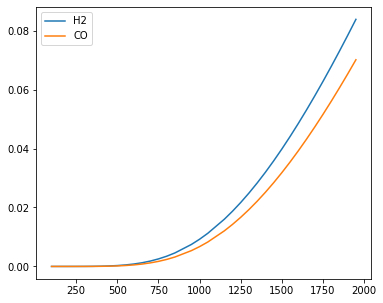

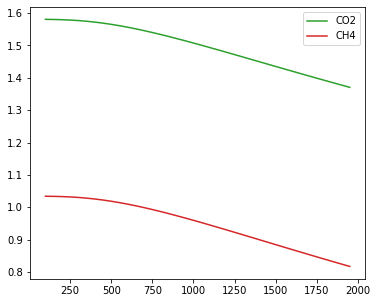

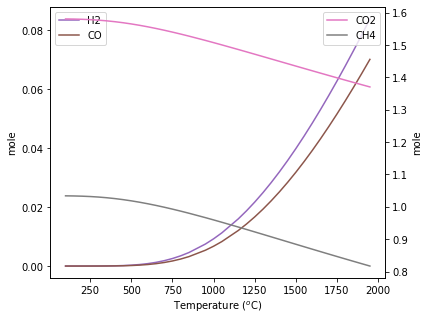

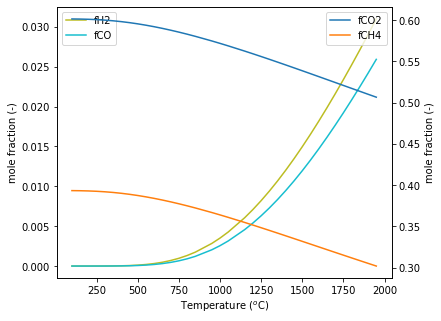

In [30]:
import matplotlib.pyplot as plt

x = list(dfQ['T'])
y = list(dfQ['H2'])

fig, ax = plt.subplots(figsize=(6,5))

color = next(ax._get_lines.prop_cycler)['color']
ax.plot(x, dfQ['H2'], color=color, label='H2')
color = next(ax._get_lines.prop_cycler)['color']
ax.plot(x, dfQ['CO'], color=color, label='CO')
plt.legend()

fig, ax2 = plt.subplots(figsize=(6,5))
color = next(ax._get_lines.prop_cycler)['color']
ax2.plot(x, dfQ['CO2'], color=color, label='CO2')
color = next(ax._get_lines.prop_cycler)['color']
ax2.plot(x, dfQ['CH4'], color=color, label='CH4')
plt.legend()

fig, ax1 = plt.subplots(figsize=(6,5))
color = next(ax._get_lines.prop_cycler)['color']
line1 = ax1.plot(x, dfQ['H2'], color=color, label='H2')
color = next(ax._get_lines.prop_cycler)['color']
line2 = ax1.plot(x, dfQ['CO'], color=color, label='CO')
ax1.set_xlabel('Temperature ($^o$C)')
ax1.set_ylabel('mole')
ax1.legend()

ax1x = ax1.twinx()

color = next(ax._get_lines.prop_cycler)['color']
line3 = ax1x.plot(x, dfQ['CO2'], color=color, label='CO2')
color = next(ax._get_lines.prop_cycler)['color']
line4 = ax1x.plot(x, dfQ['CH4'], color=color, label='CH4')
ax1x.set_ylabel('mole')
ax1x.legend()
# ax1.legend([line1,line2,line3,line4],['H2','CO','CO2','CH4'])


fig, ax2 = plt.subplots(figsize=(6,5))
color = next(ax._get_lines.prop_cycler)['color']
ax2.plot(x, dfQ['fH2'], color=color, label='fH2')
color = next(ax._get_lines.prop_cycler)['color']
ax2.plot(x, dfQ['fCO'], color=color, label='fCO')
ax2.set_xlabel('Temperature ($^o$C)')
ax2.set_ylabel('mole fraction (-)')
ax2.legend()

ax2x = ax2.twinx()

color = next(ax._get_lines.prop_cycler)['color']
ax2x.plot(x, dfQ['fCO2'], color=color, label='fCO2')
color = next(ax._get_lines.prop_cycler)['color']
ax2x.plot(x, dfQ['fCH4'], color=color, label='fCH4')
ax2x.set_ylabel('mole fraction (-)')
ax2x.legend()

plt.show()


In [31]:
dfR[['T', 'H2','fH2']]

,T,H2,fH2
0,100,3.648905e-09,5.804648e-09
1,100,4.069436e-08,4.448143e-09
2,100,4.875658e-07,2.759502e-08
3,100,1.335012e-08,8.197208e-09
4,100,4.267852e-08,4.205353e-09
...,...,...,...
1363,1950,5.150292e-02,5.040909e-03
1364,1950,7.338688e-02,3.908526e-03
1365,1950,2.260811e-02,8.504145e-03
1366,1950,7.356317e-02,6.547897e-03


In [32]:
dfR.groupby(by='T').mean()

,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,P,Steam,Air
T,,,,,,,,,,,,,,
100,1.700157,3.691393e-08,3.655175e-08,0.000371,2.080504,0.534081,7.533661,4.354665e-09,4.329767e-09,0.365648,0.112010,2.500000,1.000000,1.000000
150,1.699560,1.857982e-07,1.814185e-07,0.000978,2.080201,0.533778,7.533661,2.354115e-08,2.313414e-08,0.365605,0.111967,2.500000,1.000000,1.000000
200,1.766703,1.163463e-06,1.008103e-06,0.002242,2.094720,0.578600,7.305782,1.388350e-07,1.241595e-07,0.383860,0.121776,2.393939,1.090909,0.969697
250,1.734532,4.539321e-06,3.528537e-06,0.004143,2.063465,0.577648,7.077903,5.377971e-07,4.231848e-07,0.384533,0.121693,2.393939,1.090909,0.939394
300,1.728362,1.448279e-05,1.024520e-05,0.006718,2.077326,0.560313,7.312484,1.632494e-06,1.253294e-06,0.377326,0.117979,2.500000,1.058824,0.970588
350,1.690799,3.565924e-05,2.846507e-05,0.009885,2.075733,0.529307,7.533661,3.957126e-06,3.595984e-06,0.364970,0.111333,2.500000,1.000000,1.000000
400,1.784300,8.824291e-05,7.125279e-05,0.015161,2.118528,0.572097,7.533661,9.731055e-06,9.085100e-06,0.382121,0.120794,2.454545,1.090909,1.000000
450,1.744483,1.736737e-04,1.485947e-04,0.020227,2.099914,0.553479,7.533661,1.916318e-05,1.887977e-05,0.375563,0.116953,2.441176,1.058824,1.000000
500,1.675635,3.038875e-04,2.772581e-04,0.025298,2.067902,0.521466,7.533661,3.355353e-05,3.504398e-05,0.363843,0.110216,2.500000,1.000000,1.000000


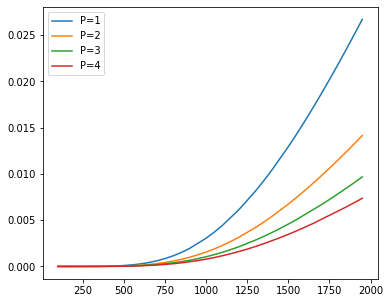

In [33]:
fig, ax = plt.subplots(figsize=(6,5))

# for T in Temp:
for P in Press:
    for d in Steam[1:2]:
        for e in Air[0:1]:
            dfQ = dfR[
                    # (dfR['T']==T) 
                    # & 
                    (dfR['P']==P) 
                    & 
                    (dfR['Steam']==d) 
                    & 
                    (dfR['Air']==e)
                    ]
            # print(dfQ[['P','Steam','Air','T','H2']])
            ax.plot(dfQ['T'], dfQ['fH2'], label=f'P={P}')

ax.legend()

plt.show()

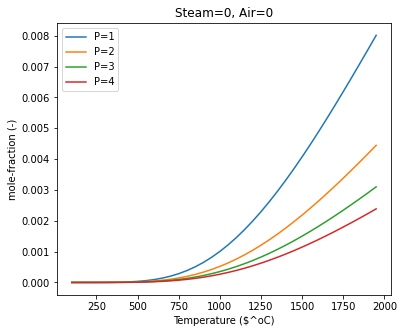

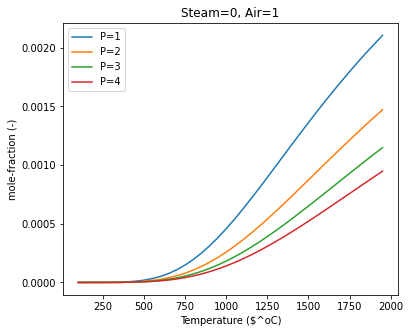

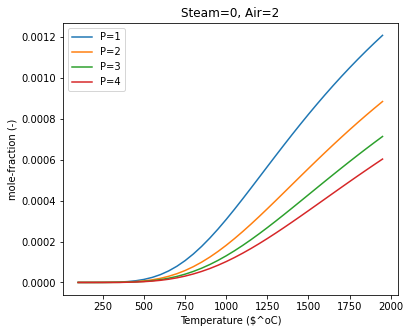

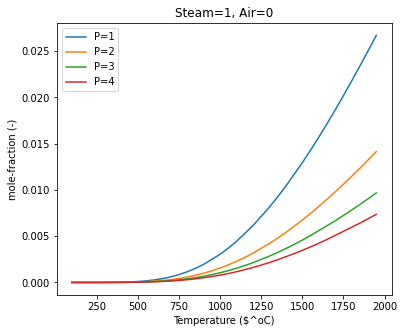

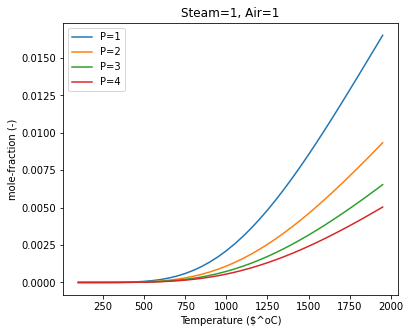

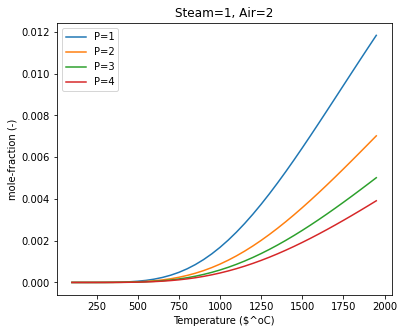

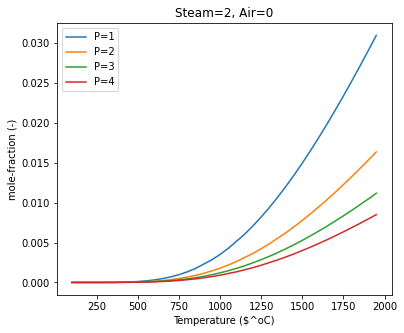

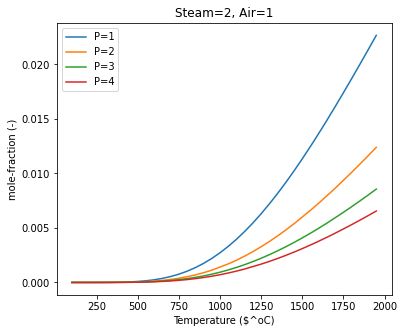

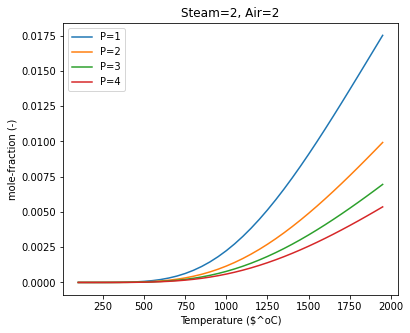

In [34]:

# for T in Temp:
for d in Steam:
    for e in Air:
        fig, ax = plt.subplots(figsize=(6,5))
        ax.set_title(label=f'Steam={d}, Air={e}')
        for P in Press:

            dfQ = dfR[
                    # (dfR['T']==T) 
                    # & 
                    (dfR['P']==P) 
                    & 
                    (dfR['Steam']==d) 
                    & 
                    (dfR['Air']==e)
                    ]
            # print(dfQ[['P','Steam','Air','T','H2']])
            ax.plot(dfQ['T'], dfQ['fH2'], label=f'P={P}')
            ax.set_xlabel('Temperature ($^o$C)')
            ax.set_ylabel('mole-fraction (-)')
            ax.legend()



plt.show()

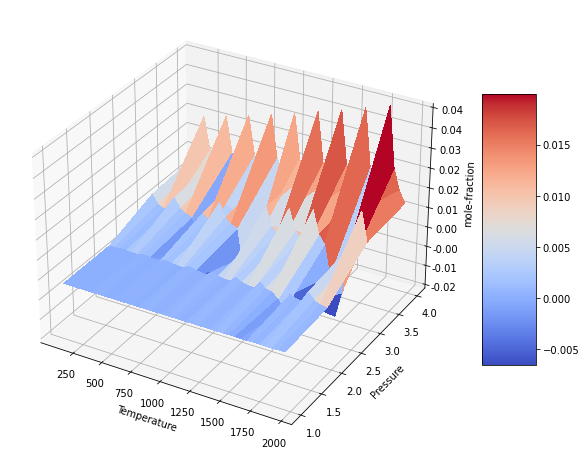

In [37]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

d = Steam[1]
e = Air[0]
dfQ = dfW[
        # (dfR['T']==T) 
        # & 
        # (dfR['P']==P) 
        # & 
        (dfW['Steam']==d) 
        & 
        (dfW['Air']==e)
        ]

# Make data.
X = Temp
Y = Press
X, Y = np.meshgrid(X, Y)
v = dfQ['H2'].to_numpy()
Z = v.reshape(4,-1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Customize the z axis.
ax.set_zlim(min(v), max(v))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Temperature')
ax.set_ylabel('Pressure')
ax.set_zlabel('mole-fraction')

plt.show()